In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [2]:
car=pd.read_csv('Car details v3.csv')
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df=car.copy()

In [4]:
df.shape

(8128, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)

1202


In [8]:
df.shape

(6926, 14)

In [9]:
df['year'].isnull().sum()

0

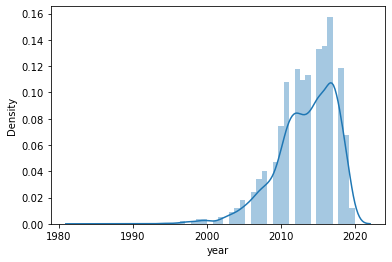

In [10]:
sns.distplot(df['year'])
plt.show()

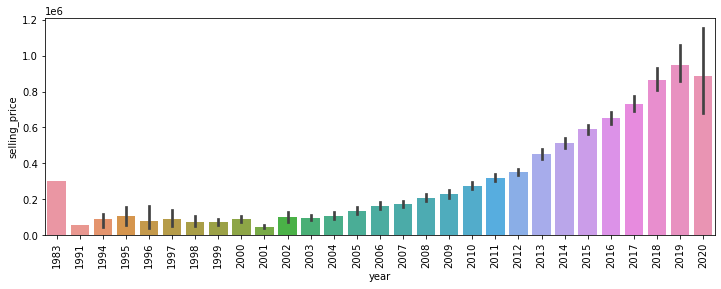

In [11]:
plt.figure(figsize=(12,4))
sns.barplot(df['year'],df['selling_price'])
plt.xticks(rotation='vertical')
plt.show()

In [12]:
df['km_driven'].isnull().sum()

0

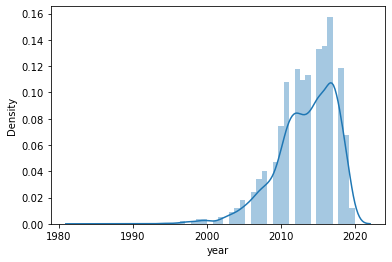

In [13]:
sns.distplot(df['year'])
plt.show()

In [14]:
df['fuel'].isnull().sum()

0

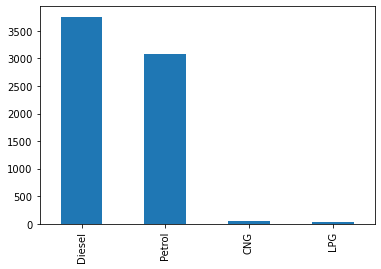

In [15]:
df['fuel'].value_counts().plot(kind='bar')
plt.show()

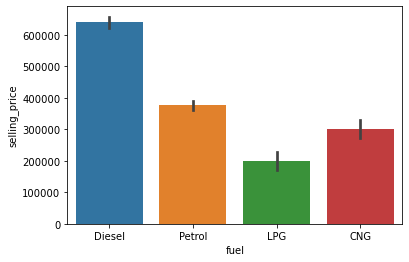

In [16]:
sns.barplot(df['fuel'],df['selling_price'])
plt.show()

In [17]:
df['seller_type'].isnull().sum()

0

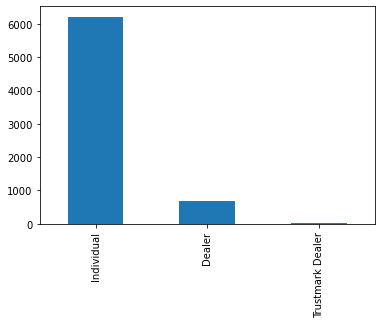

In [18]:
df['seller_type'].value_counts().plot(kind='bar')
plt.show()

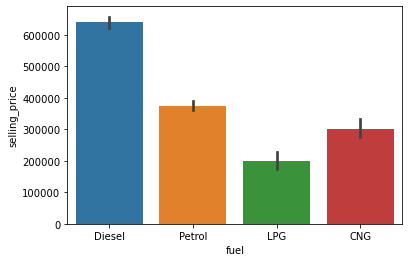

In [19]:
sns.barplot(df['fuel'],df['selling_price'])
plt.show()

In [20]:
df['transmission'].isnull().sum()

0

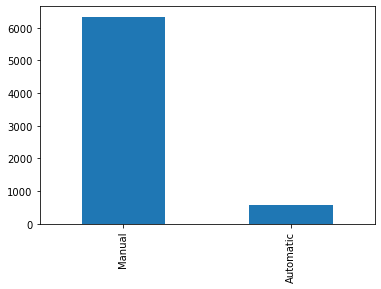

In [21]:
df['transmission'].value_counts().plot(kind='bar')
plt.show()

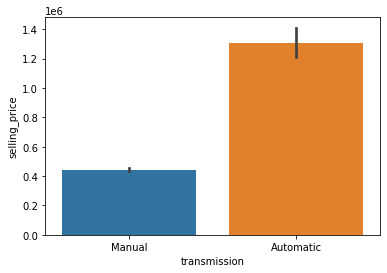

In [22]:
sns.barplot(df['transmission'],df['selling_price'])
plt.show()

In [23]:
df['owner'].isnull().sum()

0

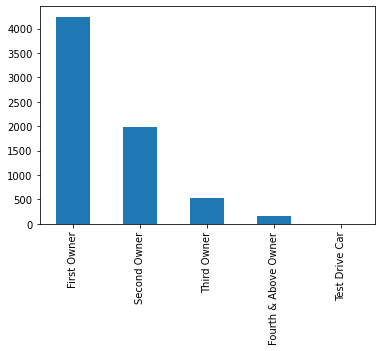

In [24]:
df['owner'].value_counts().plot(kind='bar')
plt.show()

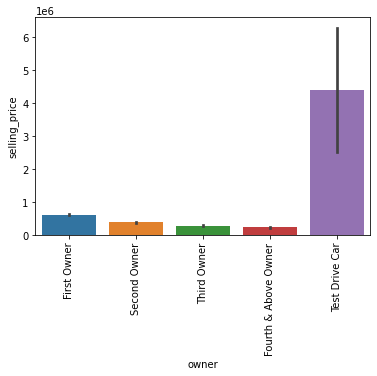

In [25]:
sns.barplot(df['owner'],df['selling_price'])
plt.xticks(rotation='vertical')
plt.show()

In [26]:
df['mileage'].isnull().sum()

208

In [27]:
df['mileage']=df['mileage'].str.replace('kmpl','')
df['mileage']=df['mileage'].str.replace('km/kg','')

In [28]:
df['mileage'].fillna(df['mileage'].median(),inplace=True)

In [29]:
df['mileage']=pd.to_numeric(df['mileage'])

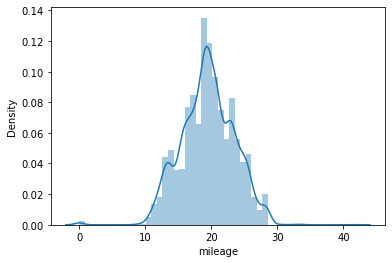

In [30]:
sns.distplot(df['mileage'])
plt.show()

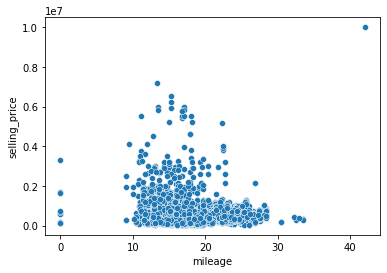

In [31]:
sns.scatterplot(df['mileage'],df['selling_price'])
plt.show()

In [32]:
df['engine']=df['engine'].str.replace('CC','')

In [33]:
df['engine_imputed']=df['engine']
df['engine_imputed'][df['engine_imputed'].isnull()] = df['engine_imputed'].dropna().sample(df['engine'].isnull().sum()).values

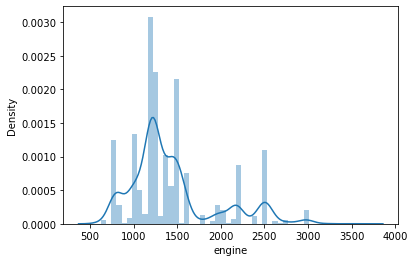

In [34]:
sns.distplot(df['engine'])
plt.show()

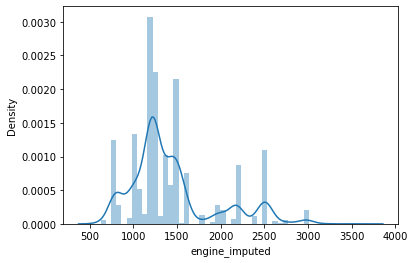

In [35]:
sns.distplot(df['engine_imputed'])
plt.show()

In [36]:
df['engine']=df['engine_imputed']
df.drop('engine_imputed',axis=1,inplace=True)
df['engine']=df['engine'].astype('int32')

In [37]:
df['max_power'].isnull().sum()

205

In [38]:
df['max_power']=df['max_power'].str.replace('bhp','')

In [39]:
df['max_power_imputed']=df['max_power']
df['max_power_imputed'][df['max_power_imputed'].isnull()] = df['max_power_imputed'].dropna().sample(df['max_power'].isnull().sum()).values

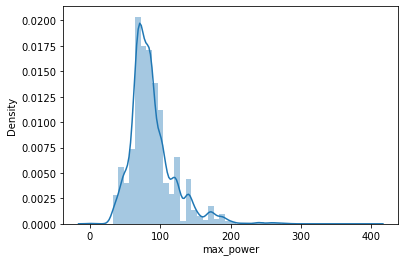

In [40]:
df.drop(4273,inplace=True)
df=df.reset_index()
sns.distplot(df['max_power'])
plt.show()

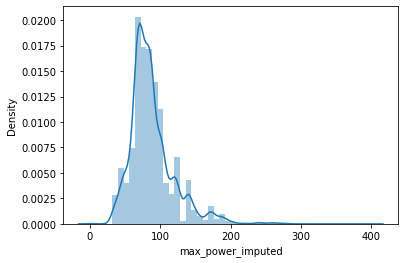

In [41]:
sns.distplot(df['max_power_imputed'])
plt.show()

In [42]:
df['max_power']=df['max_power_imputed']
df.drop('max_power_imputed',axis=1,inplace=True)
df['max_power']=df['max_power'].astype('float')

In [43]:
df.drop(['torque','level_0','index'],axis=1,inplace=True)

In [44]:
df['seats'].isnull().sum()

208

In [45]:
df['seats']=df['seats'].fillna(df['seats'].mode()[0])

In [46]:
df['seats']=df['seats'].astype('int32')

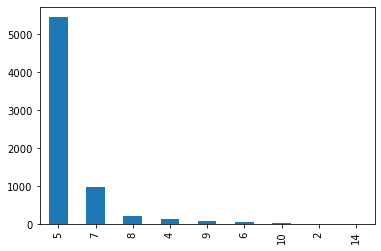

In [47]:
df['seats'].value_counts().plot(kind='bar')
plt.show()

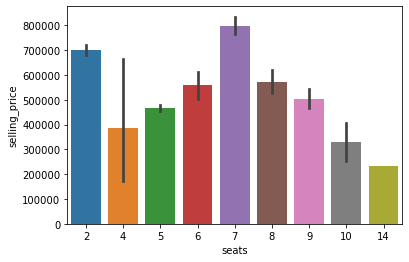

In [48]:
sns.barplot(df['seats'],df['selling_price'])
plt.show()

In [49]:
len(df['name'].value_counts())

2057

In [50]:
df.corr()['selling_price']

year             0.433037
selling_price    1.000000
km_driven       -0.165577
mileage         -0.107674
engine           0.431443
max_power        0.677833
seats            0.164357
Name: selling_price, dtype: float64

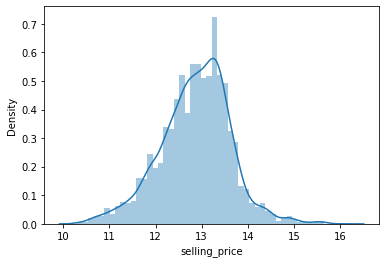

In [51]:
sns.distplot(np.log(df['selling_price']))
plt.show()

In [52]:
df['selling_price']=np.log(df['selling_price'])
df.corr()['selling_price']

year             0.718453
selling_price    1.000000
km_driven       -0.188165
mileage          0.016475
engine           0.449191
max_power        0.627211
seats            0.273613
Name: selling_price, dtype: float64

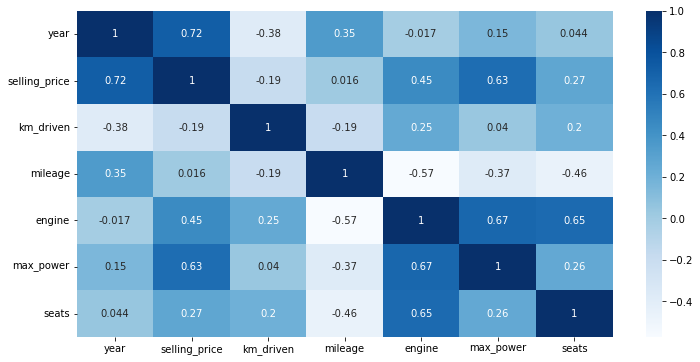

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [54]:
df['company']=df['name'].str.split(' ')
for i in range(len(df['company'])):
    df['company'][i]=df['company'][i][0]
a=df['company'].value_counts()
for i in range(len(df['company'])):
    if a[df['company'][i]] < 46:
        df['company'][i]='Others'
df.drop('name',axis=1,inplace=True)

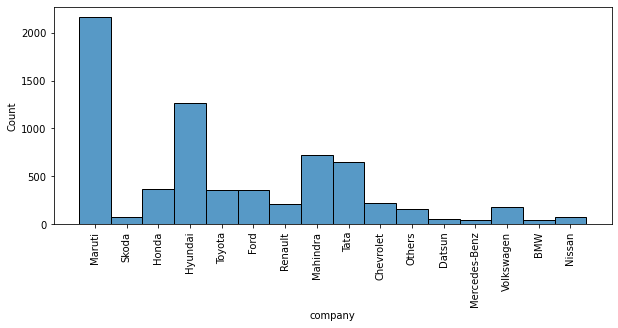

In [55]:
plt.figure(figsize=(10,4))
sns.histplot(df['company'])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6925 entries, 0 to 6924
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6925 non-null   int64  
 1   selling_price  6925 non-null   float64
 2   km_driven      6925 non-null   int64  
 3   fuel           6925 non-null   object 
 4   seller_type    6925 non-null   object 
 5   transmission   6925 non-null   object 
 6   owner          6925 non-null   object 
 7   mileage        6925 non-null   float64
 8   engine         6925 non-null   int32  
 9   max_power      6925 non-null   float64
 10  seats          6925 non-null   int32  
 11  company        6925 non-null   object 
dtypes: float64(3), int32(2), int64(2), object(5)
memory usage: 595.2+ KB


In [57]:
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
company          0
dtype: int64

In [58]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,company
0,2014,13.017003,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
1,2014,12.821258,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Skoda
2,2006,11.970350,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,12.323856,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,11.775290,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti


In [59]:
X=df.drop('selling_price',axis=1)
y=df['selling_price']

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

### Linear Regression

In [61]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[2,3,4,5,10])
    # We will not count price that's why our counting change
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8893071736610918
MAE 0.2005028851674859


### Ridge Regression

In [62]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[2,3,4,5,10])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8871093422137243
MAE 0.20175604734820354


### Lasso Regression

In [63]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[2,3,4,5,10])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8846730603991231
MAE 0.20331199379484943


### KNN

In [64]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[2,3,4,5,10])
],remainder='passthrough')

step2 = KNeighborsRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5612709558816287
MAE 0.37192609856382497


### Decision Tree

In [65]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[2,3,4,5,10])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.87747637617686
MAE 0.19963091502297264


### AdaBoost

In [66]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[2,3,4,5,10])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8140332581070508
MAE 0.2618441319830629


### Gradient Boost

In [67]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[2,3,4,5,10])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9204509759885167
MAE 0.16208769189319655


### Xgboost

In [68]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[2,3,4,5,10])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9082682107488473
MAE 0.1703035570947297


### Random Forest

In [69]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[2,3,4,5,10])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9140061518565801
MAE 0.1648015445631452


In [70]:
pickle.dump(df,open('df2.pkl','wb'))
pickle.dump(pipe,open('pipe2.pkl','wb'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>